In [1]:
import os

In [2]:
import nltk,string

In [3]:
from string import punctuation

In [4]:
import spacy
import en_core_web_sm
from collections import Counter

In [5]:
import nltk.corpus

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lehar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_excel('CaseStudy (1).xlsx')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 11 columns):
Rating                  3150 non-null int64
Customer Id             3150 non-null int64
Date                    3150 non-null datetime64[ns]
Variation               3150 non-null object
Verified_reviews        3150 non-null object
feedback                3150 non-null int64
Positive / Negative     0 non-null float64
Verbs (Lamatize)        0 non-null float64
Latest Review           0 non-null float64
Unique customer Flag    0 non-null float64
Model Identified        0 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 270.8+ KB


In [11]:
#Arranging based on Latest Date

In [12]:
df.sort_values(by=['Date'],ascending=False,inplace=True)

In [13]:
df.head(20)

,Rating,Customer Id,Date,Variation,Verified_reviews,feedback,Positive / Negative,Verbs (Lamatize),Latest Review,Unique customer Flag,Model Identified
0,5,11000057,2018-07-31,Charcoal Fabric,Love my Echo!,1,NaN,NaN,NaN,NaN,NaN
2456,4,11002513,2018-07-31,Black Dot,I like how it will connect to bluetooth withou...,1,NaN,NaN,NaN,NaN,NaN
2454,5,11002511,2018-07-31,Black Dot,Family loved it!,1,NaN,NaN,NaN,NaN,NaN
2453,5,11002510,2018-07-31,Black Dot,I like that it responds every time. It was eas...,1,NaN,NaN,NaN,NaN,NaN
2452,5,11002509,2018-07-31,Black Dot,beyond awesome,1,NaN,NaN,NaN,NaN,NaN
2451,5,11002508,2018-07-31,White Dot,Small device that my kids like to ask question...,1,NaN,NaN,NaN,NaN,NaN
2450,5,11002507,2018-07-31,Black Dot,I set her up to play through our home theater ...,1,NaN,NaN,NaN,NaN,NaN
1400,5,11001457,2018-07-31,Black Show,I love love love love it! I feel like I have ...,1,NaN,NaN,NaN,NaN,NaN
1401,5,11001458,2018-07-31,Black Show,Love the Echo Show. Being able to see the lyr...,1,NaN,NaN,NaN,NaN,NaN
1402,3,11001459,2018-07-31,Black Show,It seems to work well. Unfortunately a lot of...,1,NaN,NaN,NaN,NaN,NaN


In [14]:
# Identify Number of Unique Customers and Flag them

In [15]:
df['Unique customer Flag']=df.duplicated(['Customer Id'],keep='first')

In [16]:
#Find Latest review of Customer who has multiple Rating

In [17]:
df1=df[df['Unique customer Flag']==True]

In [18]:
df['Latest Review'] = df['Verified_reviews']
for index, value in df1.iterrows():
    loc1 = df.loc[df['Customer Id'] == value['Customer Id']]
    for index_no in loc1.index.values:
        df.at[index_no, 'Latest Review'] = value['Verified_reviews']      
  

In [19]:
#Checking for one Multiple Rating Customer

In [20]:
df2=df[df['Customer Id']==11000076]

In [21]:
df2

,Rating,Customer Id,Date,Variation,Verified_reviews,feedback,Positive / Negative,Verbs (Lamatize),Latest Review,Unique customer Flag,Model Identified
19,4,11000076,2018-07-30,Sandstone Fabric,I liked the original Echo. This is the same bu...,1,NaN,NaN,Still learning all the capabilities...but so f...,False,NaN
30,5,11000076,2018-07-30,Sandstone Fabric,Still learning all the capabilities...but so f...,1,NaN,NaN,Still learning all the capabilities...but so f...,True,NaN


In [22]:
# df.drop(['Positive / Negative', 'Verbs (Lamatize)', 'Latest Review',
#        'Unique customer Flag', 'Model Identified'],axis=1,inplace=True)

In [23]:
# identified Keywords like "Echo Dot", "Alexa", "Purchase",  "Echo Plus" , "white" , "Sound", "Purchased", "Bought" , "like"

In [24]:
def identify_words(input_text):
    word_list = ["Echo Dot", "Alexa", "Purchase",  "Echo Plus" , "white" , "Sound", "Purchased", "Bought" , "like"]
    text= [word for word in word_list if word.lower() in input_text.lower()]
    return text

df['Identify_Words']=df['Verified_reviews'].apply(lambda x: identify_words(x) )

In [25]:
df

,Rating,Customer Id,Date,Variation,Verified_reviews,feedback,Positive / Negative,Verbs (Lamatize),Latest Review,Unique customer Flag,Model Identified,Identify_Words
0,5,11000057,2018-07-31,Charcoal Fabric,Love my Echo!,1,NaN,NaN,Love my Echo!,False,NaN,[]
2456,4,11002513,2018-07-31,Black Dot,I like how it will connect to bluetooth withou...,1,NaN,NaN,I like how it will connect to bluetooth withou...,False,NaN,[like]
2454,5,11002511,2018-07-31,Black Dot,Family loved it!,1,NaN,NaN,Family loved it!,False,NaN,[]
2453,5,11002510,2018-07-31,Black Dot,I like that it responds every time. It was eas...,1,NaN,NaN,I like that it responds every time. It was eas...,False,NaN,[like]
2452,5,11002509,2018-07-31,Black Dot,beyond awesome,1,NaN,NaN,beyond awesome,False,NaN,[]
2451,5,11002508,2018-07-31,White Dot,Small device that my kids like to ask question...,1,NaN,NaN,Small device that my kids like to ask question...,False,NaN,[like]
2450,5,11002507,2018-07-31,Black Dot,I set her up to play through our home theater ...,1,NaN,NaN,I set her up to play through our home theater ...,False,NaN,[]
1400,5,11001457,2018-07-31,Black Show,I love love love love it! I feel like I have ...,1,NaN,NaN,I love love love love it! I feel like I have ...,False,NaN,[like]
1401,5,11001458,2018-07-31,Black Show,Love the Echo Show. Being able to see the lyr...,1,NaN,NaN,Love the Echo Show. Being able to see the lyr...,False,NaN,[]
1402,3,11001459,2018-07-31,Black Show,It seems to work well. Unfortunately a lot of...,1,NaN,NaN,It seems to work well. Unfortunately a lot of...,False,NaN,"[Purchase, Purchased, like]"


In [26]:
df['Verified_reviews'].isnull().sum()

0

In [27]:
#Perform EDA

In [28]:
#Remove Punctuations

In [29]:
def remove_punct(text):
    text_nopunc= "".join([char for char in text if char not in string.punctuation])
    return text_nopunc
df['verify_punctations']=df['Verified_reviews'].apply(lambda x: remove_punct(x))

In [30]:
df['verify_punctations']

0                                            Love my Echo
2456    I like how it will connect to bluetooth withou...
2454                                      Family loved it
2453    I like that it responds every time It was easy...
2452                                       beyond awesome
2451    Small device that my kids like to ask question...
2450    I set her up to play through our home theater ...
1400    I love love love love it  I feel like I have a...
1401    Love the Echo Show  Being able to see the lyri...
1402    It seems to work well  Unfortunately a lot of ...
1403    Love listening to music Still trying to learn ...
1404                     Very pleasedSimple to figure out
1405      just what I expectedalready have 2 other  shows
1406                                            Very good
1407    Excellent to listen to my music my audio books...
1408    Alexa is fun I’ve added smart home aspects my ...
1                                                Loved it
2455          

In [31]:
#Seprating words into unit through Tokenization

In [32]:
def remove_toke(text):
    word_token=nltk.word_tokenize(text)
    return word_token
df['verify_token']=df['verify_punctations'].apply(lambda x: remove_toke(x))

In [33]:
df['verify_token']

0                                        [Love, my, Echo]
2456    [I, like, how, it, will, connect, to, bluetoot...
2454                                  [Family, loved, it]
2453    [I, like, that, it, responds, every, time, It,...
2452                                    [beyond, awesome]
2451    [Small, device, that, my, kids, like, to, ask,...
2450    [I, set, her, up, to, play, through, our, home...
1400    [I, love, love, love, love, it, I, feel, like,...
1401    [Love, the, Echo, Show, Being, able, to, see, ...
1402    [It, seems, to, work, well, Unfortunately, a, ...
1403    [Love, listening, to, music, Still, trying, to...
1404               [Very, pleasedSimple, to, figure, out]
1405    [just, what, I, expectedalready, have, 2, othe...
1406                                         [Very, good]
1407    [Excellent, to, listen, to, my, music, my, aud...
1408    [Alexa, is, fun, I, ’, ve, added, smart, home,...
1                                             [Loved, it]
2455          

In [34]:
#Used Spacy to idetinfy Verbs in Review Column and Lammatize in Column L

In [35]:
nlp = en_core_web_sm.load()
def identify_verbs(text):
    docs = nlp(text)
    verbs = [verbs for verbs in docs if verbs.is_punct !=True and verbs.pos_ == 'VERB']
    return verbs
df['Verbs (Lamatize)']=df['Verified_reviews'].apply(lambda x: identify_verbs(x))

In [36]:
df

,Rating,Customer Id,Date,Variation,Verified_reviews,feedback,Positive / Negative,Verbs (Lamatize),Latest Review,Unique customer Flag,Model Identified,Identify_Words,verify_punctations,verify_token
0,5,11000057,2018-07-31,Charcoal Fabric,Love my Echo!,1,NaN,[Love],Love my Echo!,False,NaN,[],Love my Echo,"[Love, my, Echo]"
2456,4,11002513,2018-07-31,Black Dot,I like how it will connect to bluetooth withou...,1,NaN,"[like, will, connect, bluetooth, is, use]",I like how it will connect to bluetooth withou...,False,NaN,[like],I like how it will connect to bluetooth withou...,"[I, like, how, it, will, connect, to, bluetoot..."
2454,5,11002511,2018-07-31,Black Dot,Family loved it!,1,NaN,[loved],Family loved it!,False,NaN,[],Family loved it,"[Family, loved, it]"
2453,5,11002510,2018-07-31,Black Dot,I like that it responds every time. It was eas...,1,NaN,"[like, responds, was, set, 'm, learning, can, ...",I like that it responds every time. It was eas...,False,NaN,[like],I like that it responds every time It was easy...,"[I, like, that, it, responds, every, time, It,..."
2452,5,11002509,2018-07-31,Black Dot,beyond awesome,1,NaN,[],beyond awesome,False,NaN,[],beyond awesome,"[beyond, awesome]"
2451,5,11002508,2018-07-31,White Dot,Small device that my kids like to ask question...,1,NaN,"[like, ask]",Small device that my kids like to ask question...,False,NaN,[like],Small device that my kids like to ask question...,"[Small, device, that, my, kids, like, to, ask,..."
2450,5,11002507,2018-07-31,Black Dot,I set her up to play through our home theater ...,1,NaN,"[set, play, are, using, enjoy]",I set her up to play through our home theater ...,False,NaN,[],I set her up to play through our home theater ...,"[I, set, her, up, to, play, through, our, home..."
1400,5,11001457,2018-07-31,Black Show,I love love love love it! I feel like I have ...,1,NaN,"[love, feel, have, talking, tells]",I love love love love it! I feel like I have ...,False,NaN,[like],I love love love love it I feel like I have a...,"[I, love, love, love, love, it, I, feel, like,..."
1401,5,11001458,2018-07-31,Black Show,Love the Echo Show. Being able to see the lyr...,1,NaN,"[Love, Being, see, play, be, put, is]",Love the Echo Show. Being able to see the lyr...,False,NaN,[],Love the Echo Show Being able to see the lyri...,"[Love, the, Echo, Show, Being, able, to, see, ..."
1402,3,11001459,2018-07-31,Black Show,It seems to work well. Unfortunately a lot of...,1,NaN,"[seems, work, is, lost, have, mentioned, does,...",It seems to work well. Unfortunately a lot of...,False,NaN,"[Purchase, Purchased, like]",It seems to work well Unfortunately a lot of ...,"[It, seems, to, work, well, Unfortunately, a, ..."


In [37]:
# below code used to create Positive/Negative feeback

In [38]:
feedback=['Love','Awesome','nice','wonderful','Great','like','fun','clear','Good']

In [39]:
def identify_feedback(input_text):
   for word in feedback:
        if word.lower() in input_text.lower():
            return 'Positive'
        else:
            return 'Negative'
        
df['Positive / Negative']=df['Verified_reviews'].apply(lambda x: identify_feedback(x) )

In [40]:
df['Positive / Negative'].value_counts()

Negative    2253
Positive     897
Name: Positive / Negative, dtype: int64

In [41]:
df.columns

Index(['Rating ', 'Customer Id', 'Date', 'Variation', 'Verified_reviews',
       'feedback', 'Positive / Negative', 'Verbs (Lamatize)', 'Latest Review',
       'Unique customer Flag', 'Model Identified', 'Identify_Words',
       'verify_punctations', 'verify_token'],
      dtype='object')

In [42]:
# df.drop(['Customer Id', 'Date', 'Variation','verify_punctations', 'verify_token'],axis=1,inplace=True)
# df.drop(['verify_punctations', 'verify_token'],axis=1,inplace=True)

In [43]:
df.head(10)

,Rating,Customer Id,Date,Variation,Verified_reviews,feedback,Positive / Negative,Verbs (Lamatize),Latest Review,Unique customer Flag,Model Identified,Identify_Words,verify_punctations,verify_token
0,5,11000057,2018-07-31,Charcoal Fabric,Love my Echo!,1,Positive,[Love],Love my Echo!,False,NaN,[],Love my Echo,"[Love, my, Echo]"
2456,4,11002513,2018-07-31,Black Dot,I like how it will connect to bluetooth withou...,1,Negative,"[like, will, connect, bluetooth, is, use]",I like how it will connect to bluetooth withou...,False,NaN,[like],I like how it will connect to bluetooth withou...,"[I, like, how, it, will, connect, to, bluetoot..."
2454,5,11002511,2018-07-31,Black Dot,Family loved it!,1,Positive,[loved],Family loved it!,False,NaN,[],Family loved it,"[Family, loved, it]"
2453,5,11002510,2018-07-31,Black Dot,I like that it responds every time. It was eas...,1,Negative,"[like, responds, was, set, 'm, learning, can, ...",I like that it responds every time. It was eas...,False,NaN,[like],I like that it responds every time It was easy...,"[I, like, that, it, responds, every, time, It,..."
2452,5,11002509,2018-07-31,Black Dot,beyond awesome,1,Negative,[],beyond awesome,False,NaN,[],beyond awesome,"[beyond, awesome]"
2451,5,11002508,2018-07-31,White Dot,Small device that my kids like to ask question...,1,Negative,"[like, ask]",Small device that my kids like to ask question...,False,NaN,[like],Small device that my kids like to ask question...,"[Small, device, that, my, kids, like, to, ask,..."
2450,5,11002507,2018-07-31,Black Dot,I set her up to play through our home theater ...,1,Negative,"[set, play, are, using, enjoy]",I set her up to play through our home theater ...,False,NaN,[],I set her up to play through our home theater ...,"[I, set, her, up, to, play, through, our, home..."
1400,5,11001457,2018-07-31,Black Show,I love love love love it! I feel like I have ...,1,Positive,"[love, feel, have, talking, tells]",I love love love love it! I feel like I have ...,False,NaN,[like],I love love love love it I feel like I have a...,"[I, love, love, love, love, it, I, feel, like,..."
1401,5,11001458,2018-07-31,Black Show,Love the Echo Show. Being able to see the lyr...,1,Positive,"[Love, Being, see, play, be, put, is]",Love the Echo Show. Being able to see the lyr...,False,NaN,[],Love the Echo Show Being able to see the lyri...,"[Love, the, Echo, Show, Being, able, to, see, ..."
1402,3,11001459,2018-07-31,Black Show,It seems to work well. Unfortunately a lot of...,1,Negative,"[seems, work, is, lost, have, mentioned, does,...",It seems to work well. Unfortunately a lot of...,False,NaN,"[Purchase, Purchased, like]",It seems to work well Unfortunately a lot of ...,"[It, seems, to, work, well, Unfortunately, a, ..."


In [44]:
#Remove Stopwords

In [45]:
stopword=nltk.corpus.stopwords.words('english')
def remove_stopwords(tokeniz_list):
    text=[word for word in tokeniz_list if word not in stopword]
    return text
df['Verify_stop']=df['verify_token'].apply(lambda x: remove_stopwords(x))

In [46]:
df['Verify_stop']

0                                            [Love, Echo]
2456    [I, like, connect, bluetooth, without, adapter...
2454                                      [Family, loved]
2453    [I, like, responds, every, time, It, easy, set...
2452                                    [beyond, awesome]
2451    [Small, device, kids, like, ask, questions, Ve...
2450    [I, set, play, home, theater, system, So, fat,...
1400    [I, love, love, love, love, I, feel, like, I, ...
1401    [Love, Echo, Show, Being, able, see, lyrics, s...
1402    [It, seems, work, well, Unfortunately, lot, fu...
1403    [Love, listening, music, Still, trying, learn,...
1404                        [Very, pleasedSimple, figure]
1405                       [I, expectedalready, 2, shows]
1406                                         [Very, good]
1407    [Excellent, listen, music, audio, books, look,...
1408    [Alexa, fun, I, ’, added, smart, home, aspects...
1                                                 [Loved]
2455          

In [47]:
#Stemming-reduce a word to its stem form. It removes suffices, like “ing”, “ly”, “s”, etc

In [48]:
ps=nltk.PorterStemmer()
def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text
df['Verify_stem']=df['Verify_stop'].apply(lambda x: stemming(x))

In [49]:
#Lemmatization

In [50]:
wn=nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text= [wn.lemmatize(word) for word in tokenized_text]
    return text
df['Verify_lemma']=df['Verify_stem'].apply(lambda x: lemmatizing(x) )

In [51]:
df['Verify_lemma']

0                                            [love, echo]
2456    [I, like, connect, bluetooth, without, adapt, ...
2454                                       [famili, love]
2453    [I, like, respond, everi, time, It, easi, set,...
2452                                     [beyond, awesom]
2451    [small, devic, kid, like, ask, question, veri,...
2450    [I, set, play, home, theater, system, So, fat,...
1400    [I, love, love, love, love, I, feel, like, I, ...
1401    [love, echo, show, be, abl, see, lyric, song, ...
1402    [It, seem, work, well, unfortun, lot, function...
1403    [love, listen, music, still, tri, learn, everyth]
1404                          [veri, pleasedsimpl, figur]
1405                        [I, expectedalreadi, 2, show]
1406                                         [veri, good]
1407    [excel, listen, music, audio, book, look, came...
1408    [alexa, fun, I, ’, ad, smart, home, aspect, fr...
1                                                  [love]
2455          

In [68]:
# Vectorizing Data: TF-IDF - It computes “relative frequency” that a word appears in a document compared to its frequency across all documents

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
tfidt_vect= TfidfVectorizer()
x_tfid=tfidt_vect.fit_transform(df['Verified_reviews'])
tfidt_vect.get_feature_names()

['00',
 '000',
 '07',
 '10',
 '100',
 '100x',
 '11',
 '1100sf',
 '12',
 '129',
 '12am',
 '15',
 '150',
 '18',
 '19',
 '1964',
 '1990',
 '1gb',
 '1rst',
 '1st',
 '20',
 '200',
 '2000',
 '2017',
 '229',
 '23',
 '24',
 '25',
 '29',
 '2nd',
 '2package',
 '30',
 '300',
 '30pm',
 '34',
 '360',
 '39',
 '3rd',
 '3x',
 '3xs',
 '40',
 '45',
 '48',
 '4am',
 '4ghz',
 '4k',
 '4th',
 '50',
 '54',
 '5am',
 '5ghz',
 '5th',
 '600',
 '62',
 '672',
 '6th',
 '70',
 '75',
 '79',
 '80',
 '80s',
 '81',
 '83',
 '85',
 '88',
 '888',
 '8gb',
 '90',
 '91',
 '911',
 '99',
 '_specifically_',
 'a1',
 'a19',
 'abay',
 'abc',
 'abd',
 'abilities',
 'ability',
 'able',
 'abode',
 'about',
 'above',
 'absolutely',
 'absolutly',
 'ac',
 'accent',
 'acceptable',
 'accepting',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessories',
 'accesss',
 'accident',
 'accidentally',
 'accompanying',
 'accomplish',
 'accomplished',
 'according',
 'accordingly',
 'account',
 'accounts',
 'accuracy',
 'accurate',
 'accu

In [54]:
df['Verified_reviews_len']=df['Verified_reviews'].apply(lambda x: len(x) - x.count(" "))

In [71]:
df.head(10)

,Rating,Customer Id,Date,Variation,Verified_reviews,feedback,Positive / Negative,Verbs (Lamatize),Latest Review,Unique customer Flag,Model Identified,Identify_Words,verify_punctations,verify_token,Verify_stop,Verify_stem,Verify_lemma,Verified_reviews_len
0,5,11000057,2018-07-31,Charcoal Fabric,Love my Echo!,1,Positive,[Love],Love my Echo!,False,NaN,[],Love my Echo,"[Love, my, Echo]","[Love, Echo]","[love, echo]","[love, echo]",11
2456,4,11002513,2018-07-31,Black Dot,I like how it will connect to bluetooth withou...,1,Negative,"[like, will, connect, bluetooth, is, use]",I like how it will connect to bluetooth withou...,False,NaN,[like],I like how it will connect to bluetooth withou...,"[I, like, how, it, will, connect, to, bluetoot...","[I, like, connect, bluetooth, without, adapter...","[I, like, connect, bluetooth, without, adapt, ...","[I, like, connect, bluetooth, without, adapt, ...",127
2454,5,11002511,2018-07-31,Black Dot,Family loved it!,1,Positive,[loved],Family loved it!,False,NaN,[],Family loved it,"[Family, loved, it]","[Family, loved]","[famili, love]","[famili, love]",14
2453,5,11002510,2018-07-31,Black Dot,I like that it responds every time. It was eas...,1,Negative,"[like, responds, was, set, 'm, learning, can, ...",I like that it responds every time. It was eas...,False,NaN,[like],I like that it responds every time It was easy...,"[I, like, that, it, responds, every, time, It,...","[I, like, responds, every, time, It, easy, set...","[I, like, respond, everi, time, It, easi, set,...","[I, like, respond, everi, time, It, easi, set,...",106
2452,5,11002509,2018-07-31,Black Dot,beyond awesome,1,Negative,[],beyond awesome,False,NaN,[],beyond awesome,"[beyond, awesome]","[beyond, awesome]","[beyond, awesom]","[beyond, awesom]",13
2451,5,11002508,2018-07-31,White Dot,Small device that my kids like to ask question...,1,Negative,"[like, ask]",Small device that my kids like to ask question...,False,NaN,[like],Small device that my kids like to ask question...,"[Small, device, that, my, kids, like, to, ask,...","[Small, device, kids, like, ask, questions, Ve...","[small, devic, kid, like, ask, question, veri,...","[small, devic, kid, like, ask, question, veri,...",68
2450,5,11002507,2018-07-31,Black Dot,I set her up to play through our home theater ...,1,Negative,"[set, play, are, using, enjoy]",I set her up to play through our home theater ...,False,NaN,[],I set her up to play through our home theater ...,"[I, set, her, up, to, play, through, our, home...","[I, set, play, home, theater, system, So, fat,...","[I, set, play, home, theater, system, So, fat,...","[I, set, play, home, theater, system, So, fat,...",124
1400,5,11001457,2018-07-31,Black Show,I love love love love it! I feel like I have ...,1,Positive,"[love, feel, have, talking, tells]",I love love love love it! I feel like I have ...,False,NaN,[like],I love love love love it I feel like I have a...,"[I, love, love, love, love, it, I, feel, like,...","[I, love, love, love, love, I, feel, like, I, ...","[I, love, love, love, love, I, feel, like, I, ...","[I, love, love, love, love, I, feel, like, I, ...",72
1401,5,11001458,2018-07-31,Black Show,Love the Echo Show. Being able to see the lyr...,1,Positive,"[Love, Being, see, play, be, put, is]",Love the Echo Show. Being able to see the lyr...,False,NaN,[],Love the Echo Show Being able to see the lyri...,"[Love, the, Echo, Show, Being, able, to, see, ...","[Love, Echo, Show, Being, able, see, lyrics, s...","[love, echo, show, be, abl, see, lyric, song, ...","[love, echo, show, be, abl, see, lyric, song, ...",107
1402,3,11001459,2018-07-31,Black Show,It seems to work well. Unfortunately a lot of...,1,Negative,"[seems, work, is, lost, have, mentioned, does,...",It seems to work well. Unfortunately a lot of...,False,NaN,"[Purchase, Purchased, like]",It seems to work well Unfortunately a lot of ...,"[It, seems, to, work, well, Unfortunately, a, ...","[It, seems, work, well, Unfortunately, lot, fu...","[It, seem, work, we

In [72]:
# df['Verified_reviews_len'].value_counts()

C:\Users\lehar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\lehar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


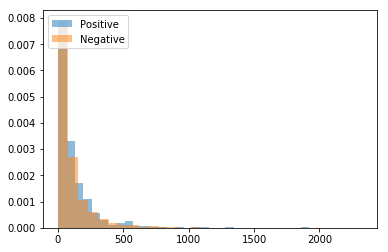

In [73]:
bins=np.linspace(0,200,40)
plt.hist(df[df['Positive / Negative']=='Positive']['Verified_reviews_len'],bins=30,alpha=0.5,normed=True,label='Positive')
plt.hist(df[df['Positive / Negative']=='Negative']['Verified_reviews_len'],bins=30,alpha=0.5,normed=True,label='Negative')
plt.legend(loc='upper left')
plt.show()

In [75]:
df.columns

Index(['Rating ', 'Customer Id', 'Date', 'Variation', 'Verified_reviews',
       'feedback', 'Positive / Negative', 'Verbs (Lamatize)', 'Latest Review',
       'Unique customer Flag', 'Model Identified', 'Identify_Words',
       'verify_punctations', 'verify_token', 'Verify_stop', 'Verify_stem',
       'Verify_lemma', 'Verified_reviews_len'],
      dtype='object')

In [77]:
df1=df[['Rating ', 'Customer Id', 'Date', 'Variation', 'Verified_reviews',
       'feedback', 'Positive / Negative', 'Verbs (Lamatize)', 'Latest Review',
       'Unique customer Flag',  'Identify_Words']]

In [85]:
df1

,Rating,Customer Id,Date,Variation,Verified_reviews,feedback,Positive / Negative,Verbs (Lamatize),Latest Review,Unique customer Flag,Identify_Words
0,5,11000057,2018-07-31,Charcoal Fabric,Love my Echo!,1,Positive,[Love],Love my Echo!,False,[]
2456,4,11002513,2018-07-31,Black Dot,I like how it will connect to bluetooth withou...,1,Negative,"[like, will, connect, bluetooth, is, use]",I like how it will connect to bluetooth withou...,False,[like]
2454,5,11002511,2018-07-31,Black Dot,Family loved it!,1,Positive,[loved],Family loved it!,False,[]
2453,5,11002510,2018-07-31,Black Dot,I like that it responds every time. It was eas...,1,Negative,"[like, responds, was, set, 'm, learning, can, ...",I like that it responds every time. It was eas...,False,[like]
2452,5,11002509,2018-07-31,Black Dot,beyond awesome,1,Negative,[],beyond awesome,False,[]
2451,5,11002508,2018-07-31,White Dot,Small device that my kids like to ask question...,1,Negative,"[like, ask]",Small device that my kids like to ask question...,False,[like]
2450,5,11002507,2018-07-31,Black Dot,I set her up to play through our home theater ...,1,Negative,"[set, play, are, using, enjoy]",I set her up to play through our home theater ...,False,[]
1400,5,11001457,2018-07-31,Black Show,I love love love love it! I feel like I have ...,1,Positive,"[love, feel, have, talking, tells]",I love love love love it! I feel like I have ...,False,[like]
1401,5,11001458,2018-07-31,Black Show,Love the Echo Show. Being able to see the lyr...,1,Positive,"[Love, Being, see, play, be, put, is]",Love the Echo Show. Being able to see the lyr...,False,[]
1402,3,11001459,2018-07-31,Black Show,It seems to work well. Unfortunately a lot of...,1,Negative,"[seems, work, is, lost, have, mentioned, does,...",It seems to work well. Unfortunately a lot of...,False,"[Purchase, Purchased, like]"


In [88]:
df1.to_csv('Case Study Output.csv')

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [90]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['Verified_reviews'])

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Positive / Negative'], test_size=0.3, random_state=1)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [94]:
logistic=LogisticRegression(C=1,penalty='l1')

In [95]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
logistic_pred=logistic.predict(X_test)

In [97]:
classification_report(logistic_pred,y_test)

'              precision    recall  f1-score   support\n\n    Negative       1.00      1.00      1.00       682\n    Positive       1.00      1.00      1.00       263\n\n   micro avg       1.00      1.00      1.00       945\n   macro avg       1.00      1.00      1.00       945\nweighted avg       1.00      1.00      1.00       945\n'

In [98]:
accuracy_score(logistic_pred,y_test)

1.0

In [99]:
confusion_matrix(logistic_pred,y_test)

array([[682,   0],
       [  0, 263]], dtype=int64)